Text(0.5,1,'Purple = Outer Circle Class, Yellow = Inner Circle Class')

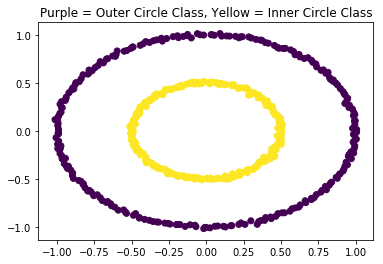

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
circles_data, circles_labels = make_circles(n_samples=500, noise=0.01, factor=.5)

# circles_data[:,0] is the X-coordinate of the points
# circles_data[:,1] is the Y-coordinate of the points
# circles_labels is either 0 or 1 denoting outside or inner circle class
plt.scatter(circles_data[:,0], circles_data[:,1], c = circles_labels, cmap='viridis')
plt.title('Purple = Outer Circle Class, Yellow = Inner Circle Class')

(500, 2)


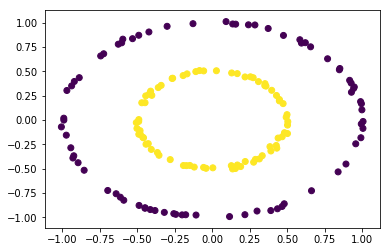

In [2]:
# 30% of Data for Training

print(circles_data.shape)
circleSlice_X, circleSlice_Y = circles_data[:150], circles_labels[:150]
testSlice_X, testSlice_Y = circles_data[150:], circles_labels[150:]
plt.scatter(circleSlice_X[:, 0], circleSlice_X[:, 1], c = circleSlice_Y, cmap = 'viridis')

In [3]:
from sklearn.cluster import KMeans
X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [4,0]])
km = KMeans(n_clusters=2, random_state = 0).fit(X)
km.cluster_centers_

array([[1., 2.],
       [4., 2.]])

In [4]:
centerTest = KMeans(n_clusters = 10, random_state = 0).fit(circleSlice_X)
centers = centerTest.cluster_centers_
print(centers)

[[-0.67345096  0.67768528]
 [ 0.26828744 -0.36661242]
 [-0.94497897 -0.24567851]
 [ 0.37352199  0.8877507 ]
 [ 0.36681638  0.27240323]
 [-0.38271639 -0.24629057]
 [ 0.94924984  0.13892243]
 [-0.40174591 -0.89727587]
 [-0.28393603  0.36454323]
 [ 0.43390535 -0.86254378]]


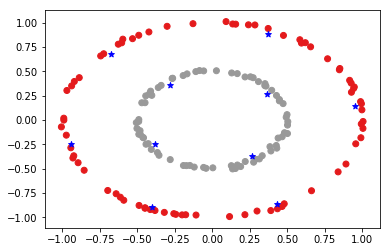

In [5]:
plt.scatter(circleSlice_X[:, 0], circleSlice_X[:, 1], c = circleSlice_Y, cmap = 'Set1')
plt.scatter(centers[:,0], centers[:,1], color = 'blue', marker = '*')

In [6]:
# map from centers to hidden layer space
# pseudo inverse of hidden layer space * tranposed y labels to get weights
import math

def GaussianRBF(x, center,sigma):
    r = math.sqrt((float(x[0] - center[0])**2) + (float(x[1] - center[1])**2))
    return math.exp(-(r**2)/2*sigma)

#print(GaussianRBF([0,0], [0.1,0.1], 1)), test with hw problem from Question 2 --> 0.99
    
def mapFromCenters(x, centers):
    hiddenSpaceRepresentation = np.ones((len(x), len(centers)+1))
    for i in range(len(x)):
        for j in range(len(centers)):
            hiddenSpaceRepresentation[i][j+1] = GaussianRBF(x[i], centers[j], 1)
    return hiddenSpaceRepresentation

def computeWeights(hiddenSpaceRepresentation, y):
    psinv = np.linalg.pinv(hiddenSpaceRepresentation)
    return np.dot(psinv, np.transpose(y))

def predict(x, centers, weights):
    mapping = np.ones(len(centers)+1)
    for i in range(len(centers)):
        mapping[i+1] = GaussianRBF(x, centers[i], 1)
    
    output = np.dot(mapping, weights)
    if (output > 0):
        output = 1
    else:
        output = 0
    return output
        
        
HSR = mapFromCenters(circleSlice_X, centers)
weights = computeWeights(HSR, circleSlice_Y)
TP = 0
FP = 0
TN = 0
FN = 0

# TEST WEIGHTS LEARNED ON THE TRAINING DATA ON TEST SET
misclassified_instances = []
for i in range(len(testSlice_X)):
    output = predict(testSlice_X[i], centers, weights)
    if (testSlice_Y[i] == 1 and output == 1):
        TP += 1
    elif (testSlice_Y[i] == 1 and output == 0):
        FN += 1
        misclassified_instances.append(testSlice_X[i])
    elif (testSlice_Y[i] == 0 and output == 1):
        FP += 1
        misclassified_instances.append(testSlice_X[i])
    elif (testSlice_Y[i] == 0 and output == 0):
        TN += 1

        
print("CONFUSION MATRIX")
print("TP: " + str(TP) + " FP: " + str(FP))
print("FN: " + str(FN) + " TN: " + str(TN))
print('\n')
print("Total Accuracy: ")
print((TP+TN) / (TP+FP+FN+TN) *100)

CONFUSION MATRIX
TP: 175 FP: 90
FN: 0 TN: 85


Total Accuracy: 
74.28571428571429


Text(0.5,1,'Blue = Centers, Red = Misclassified Instances, Grey = Inner Class, Green = Outer Class')

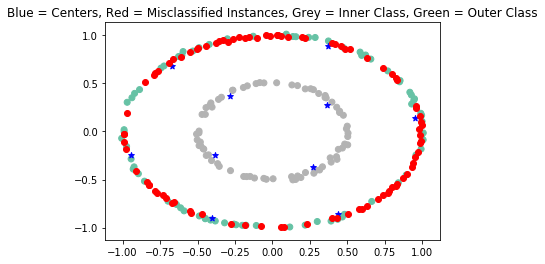

In [7]:
plt.scatter(circleSlice_X[:, 0], circleSlice_X[:, 1], c = circleSlice_Y, cmap = 'Set2')
plt.scatter(centers[:,0], centers[:,1], color = 'blue', marker = '*')
misclassified_instances = np.array(misclassified_instances)
plt.scatter(misclassified_instances[:,0], misclassified_instances[:,1], color = 'red')
plt.title('Blue = Centers, Red = Misclassified Instances, Grey = Inner Class, Green = Outer Class')

In [11]:
# NEURAL NETWORK
# 2 hidden layers, 5 hidden nodes in each layer
from keras.models import Sequential
from keras.layers import Dense

# Create Model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(circleSlice_X, circleSlice_Y, epochs = 1000, batch_size = 50)

Epoch 1/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.6770 - acc: 0.5067
Epoch 2/1000
150/150 [==============================] - 0s 31us/step - loss: 0.6763 - acc: 0.5067
Epoch 3/1000
150/150 [==============================] - 0s 33us/step - loss: 0.6756 - acc: 0.5067
Epoch 4/1000
150/150 [==============================] - 0s 32us/step - loss: 0.6749 - acc: 0.5067
Epoch 5/1000
150/150 [==============================] - 0s 31us/step - loss: 0.6742 - acc: 0.5133
Epoch 6/1000
150/150 [==============================] - 0s 29us/step - loss: 0.6736 - acc: 0.5133
Epoch 7/1000
150/150 [==============================] - 0s 28us/step - loss: 0.6729 - acc: 0.5133
Epoch 8/1000
150/150 [==============================] - 0s 31us/step - loss: 0.6722 - acc: 0.5133
Epoch 9/1000
150/150 [==============================] - 0s 29us/step - loss: 0.6715 - acc: 0.5200
Epoch 10/1000
150/150 [==============================] - 0s 28us/step - loss: 0.6709 - acc: 0.5133
Epoch 11/1000
150/15

150/150 [==============================] - 0s 31us/step - loss: 0.6140 - acc: 0.6533
Epoch 84/1000
150/150 [==============================] - 0s 33us/step - loss: 0.6125 - acc: 0.6533
Epoch 85/1000
150/150 [==============================] - 0s 32us/step - loss: 0.6109 - acc: 0.6533
Epoch 86/1000
150/150 [==============================] - 0s 35us/step - loss: 0.6093 - acc: 0.6533
Epoch 87/1000
150/150 [==============================] - 0s 33us/step - loss: 0.6075 - acc: 0.6667
Epoch 88/1000
150/150 [==============================] - 0s 30us/step - loss: 0.6057 - acc: 0.6667
Epoch 89/1000
150/150 [==============================] - 0s 32us/step - loss: 0.6039 - acc: 0.6733
Epoch 90/1000
150/150 [==============================] - 0s 26us/step - loss: 0.6020 - acc: 0.6733
Epoch 91/1000
150/150 [==============================] - 0s 38us/step - loss: 0.6001 - acc: 0.6733
Epoch 92/1000
150/150 [==============================] - 0s 27us/step - loss: 0.5982 - acc: 0.6800
Epoch 93/1000
150/150 [=

150/150 [==============================] - 0s 35us/step - loss: 0.4320 - acc: 0.9800
Epoch 166/1000
150/150 [==============================] - 0s 36us/step - loss: 0.4287 - acc: 0.9800
Epoch 167/1000
150/150 [==============================] - 0s 30us/step - loss: 0.4256 - acc: 0.9867
Epoch 168/1000
150/150 [==============================] - 0s 31us/step - loss: 0.4225 - acc: 0.9867
Epoch 169/1000
150/150 [==============================] - 0s 29us/step - loss: 0.4196 - acc: 0.9867
Epoch 170/1000
150/150 [==============================] - 0s 33us/step - loss: 0.4167 - acc: 0.9933
Epoch 171/1000
150/150 [==============================] - 0s 29us/step - loss: 0.4137 - acc: 1.0000
Epoch 172/1000
150/150 [==============================] - 0s 28us/step - loss: 0.4109 - acc: 1.0000
Epoch 173/1000
150/150 [==============================] - 0s 30us/step - loss: 0.4080 - acc: 1.0000
Epoch 174/1000
150/150 [==============================] - 0s 36us/step - loss: 0.4052 - acc: 1.0000
Epoch 175/1000


150/150 [==============================] - 0s 31us/step - loss: 0.1966 - acc: 1.0000
Epoch 248/1000
150/150 [==============================] - 0s 29us/step - loss: 0.1945 - acc: 1.0000
Epoch 249/1000
150/150 [==============================] - 0s 30us/step - loss: 0.1924 - acc: 1.0000
Epoch 250/1000
150/150 [==============================] - 0s 32us/step - loss: 0.1903 - acc: 1.0000
Epoch 251/1000
150/150 [==============================] - 0s 30us/step - loss: 0.1884 - acc: 1.0000
Epoch 252/1000
150/150 [==============================] - 0s 32us/step - loss: 0.1864 - acc: 1.0000
Epoch 253/1000
150/150 [==============================] - 0s 33us/step - loss: 0.1844 - acc: 1.0000
Epoch 254/1000
150/150 [==============================] - 0s 26us/step - loss: 0.1825 - acc: 1.0000
Epoch 255/1000
150/150 [==============================] - 0s 27us/step - loss: 0.1807 - acc: 1.0000
Epoch 256/1000
150/150 [==============================] - 0s 29us/step - loss: 0.1788 - acc: 1.0000
Epoch 257/1000


150/150 [==============================] - 0s 28us/step - loss: 0.0934 - acc: 1.0000
Epoch 330/1000
150/150 [==============================] - 0s 27us/step - loss: 0.0926 - acc: 1.0000
Epoch 331/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0918 - acc: 1.0000
Epoch 332/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0911 - acc: 1.0000
Epoch 333/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0903 - acc: 1.0000
Epoch 334/1000
150/150 [==============================] - 0s 38us/step - loss: 0.0896 - acc: 1.0000
Epoch 335/1000
150/150 [==============================] - 0s 32us/step - loss: 0.0889 - acc: 1.0000
Epoch 336/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0882 - acc: 1.0000
Epoch 337/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0874 - acc: 1.0000
Epoch 338/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0867 - acc: 1.0000
Epoch 339/1000


150/150 [==============================] - 0s 29us/step - loss: 0.0496 - acc: 1.0000
Epoch 412/1000
150/150 [==============================] - 0s 33us/step - loss: 0.0493 - acc: 1.0000
Epoch 413/1000
150/150 [==============================] - 0s 36us/step - loss: 0.0489 - acc: 1.0000
Epoch 414/1000
150/150 [==============================] - 0s 32us/step - loss: 0.0485 - acc: 1.0000
Epoch 415/1000
150/150 [==============================] - 0s 26us/step - loss: 0.0482 - acc: 1.0000
Epoch 416/1000
150/150 [==============================] - 0s 27us/step - loss: 0.0478 - acc: 1.0000
Epoch 417/1000
150/150 [==============================] - 0s 26us/step - loss: 0.0475 - acc: 1.0000
Epoch 418/1000
150/150 [==============================] - 0s 28us/step - loss: 0.0471 - acc: 1.0000
Epoch 419/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0468 - acc: 1.0000
Epoch 420/1000
150/150 [==============================] - 0s 26us/step - loss: 0.0465 - acc: 1.0000
Epoch 421/1000


150/150 [==============================] - 0s 33us/step - loss: 0.0292 - acc: 1.0000
Epoch 494/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0290 - acc: 1.0000
Epoch 495/1000
150/150 [==============================] - 0s 26us/step - loss: 0.0289 - acc: 1.0000
Epoch 496/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0287 - acc: 1.0000
Epoch 497/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0286 - acc: 1.0000
Epoch 498/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0284 - acc: 1.0000
Epoch 499/1000
150/150 [==============================] - 0s 32us/step - loss: 0.0282 - acc: 1.0000
Epoch 500/1000
150/150 [==============================] - 0s 339us/step - loss: 0.0281 - acc: 1.0000
Epoch 501/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0279 - acc: 1.0000
Epoch 502/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0278 - acc: 1.0000
Epoch 503/1000

150/150 [==============================] - 0s 31us/step - loss: 0.0190 - acc: 1.0000
Epoch 576/1000
150/150 [==============================] - 0s 39us/step - loss: 0.0189 - acc: 1.0000
Epoch 577/1000
150/150 [==============================] - 0s 34us/step - loss: 0.0188 - acc: 1.0000
Epoch 578/1000
150/150 [==============================] - 0s 51us/step - loss: 0.0187 - acc: 1.0000
Epoch 579/1000
150/150 [==============================] - 0s 48us/step - loss: 0.0186 - acc: 1.0000
Epoch 580/1000
150/150 [==============================] - 0s 40us/step - loss: 0.0185 - acc: 1.0000
Epoch 581/1000
150/150 [==============================] - 0s 39us/step - loss: 0.0184 - acc: 1.0000
Epoch 582/1000
150/150 [==============================] - 0s 40us/step - loss: 0.0183 - acc: 1.0000
Epoch 583/1000
150/150 [==============================] - 0s 41us/step - loss: 0.0183 - acc: 1.0000
Epoch 584/1000
150/150 [==============================] - 0s 49us/step - loss: 0.0182 - acc: 1.0000
Epoch 585/1000


150/150 [==============================] - 0s 35us/step - loss: 0.0131 - acc: 1.0000
Epoch 657/1000
150/150 [==============================] - 0s 28us/step - loss: 0.0131 - acc: 1.0000
Epoch 658/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0130 - acc: 1.0000
Epoch 659/1000
150/150 [==============================] - 0s 27us/step - loss: 0.0130 - acc: 1.0000
Epoch 660/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0129 - acc: 1.0000
Epoch 661/1000
150/150 [==============================] - 0s 28us/step - loss: 0.0129 - acc: 1.0000
Epoch 662/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0128 - acc: 1.0000
Epoch 663/1000
150/150 [==============================] - 0s 36us/step - loss: 0.0128 - acc: 1.0000
Epoch 664/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0127 - acc: 1.0000
Epoch 665/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0127 - acc: 1.0000
Epoch 666/1000


150/150 [==============================] - 0s 60us/step - loss: 0.0095 - acc: 1.0000
Epoch 739/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0095 - acc: 1.0000
Epoch 740/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0094 - acc: 1.0000
Epoch 741/1000
150/150 [==============================] - 0s 28us/step - loss: 0.0094 - acc: 1.0000
Epoch 742/1000
150/150 [==============================] - 0s 28us/step - loss: 0.0094 - acc: 1.0000
Epoch 743/1000
150/150 [==============================] - 0s 32us/step - loss: 0.0093 - acc: 1.0000
Epoch 744/1000
150/150 [==============================] - 0s 298us/step - loss: 0.0093 - acc: 1.0000
Epoch 745/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0093 - acc: 1.0000
Epoch 746/1000
150/150 [==============================] - 0s 32us/step - loss: 0.0092 - acc: 1.0000
Epoch 747/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0092 - acc: 1.0000
Epoch 748/1000

150/150 [==============================] - 0s 32us/step - loss: 0.0071 - acc: 1.0000
Epoch 821/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0071 - acc: 1.0000
Epoch 822/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0071 - acc: 1.0000
Epoch 823/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0070 - acc: 1.0000
Epoch 824/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0070 - acc: 1.0000
Epoch 825/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0070 - acc: 1.0000
Epoch 826/1000
150/150 [==============================] - 0s 34us/step - loss: 0.0070 - acc: 1.0000
Epoch 827/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0069 - acc: 1.0000
Epoch 828/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0069 - acc: 1.0000
Epoch 829/1000
150/150 [==============================] - 0s 31us/step - loss: 0.0069 - acc: 1.0000
Epoch 830/1000


150/150 [==============================] - 0s 30us/step - loss: 0.0054 - acc: 1.0000
Epoch 903/1000
150/150 [==============================] - 0s 34us/step - loss: 0.0054 - acc: 1.0000
Epoch 904/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0054 - acc: 1.0000
Epoch 905/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0054 - acc: 1.0000
Epoch 906/1000
150/150 [==============================] - 0s 33us/step - loss: 0.0054 - acc: 1.0000
Epoch 907/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0054 - acc: 1.0000
Epoch 908/1000
150/150 [==============================] - 0s 30us/step - loss: 0.0053 - acc: 1.0000
Epoch 909/1000
150/150 [==============================] - 0s 38us/step - loss: 0.0053 - acc: 1.0000
Epoch 910/1000
150/150 [==============================] - 0s 33us/step - loss: 0.0053 - acc: 1.0000
Epoch 911/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0053 - acc: 1.0000
Epoch 912/1000


150/150 [==============================] - 0s 27us/step - loss: 0.0043 - acc: 1.0000
Epoch 985/1000
150/150 [==============================] - 0s 25us/step - loss: 0.0042 - acc: 1.0000
Epoch 986/1000
150/150 [==============================] - 0s 39us/step - loss: 0.0042 - acc: 1.0000
Epoch 987/1000
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 30us/step - loss: 0.0042 - acc: 1.0000
Epoch 988/1000
150/150 [==============================] - 0s 34us/step - loss: 0.0042 - acc: 1.0000
Epoch 989/1000
150/150 [==============================] - 0s 32us/step - loss: 0.0042 - acc: 1.0000
Epoch 990/1000
150/150 [==============================] - 0s 24us/step - loss: 0.0042 - acc: 1.0000
Epoch 991/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0042 - acc: 1.0000
Epoch 992/1000
150/150 [==============================] - 0s 29us/step - loss: 0.0042 - acc: 1.0000
Epoch 993/1000
150/150 [==============================] - 0s 34us/step - loss

In [14]:
model.evaluate(testSlice_X, testSlice_Y)[1] * 100

350/350 [==============================] - 0s 17us/step


100.0